In [1]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pylab as plt
%matplotlib inline
import re
import gc
import glob


In [2]:
data0 = pd.read_csv("parking-tickets-2020/Parking_Tags_Data_2020.000.csv")
data1 = pd.read_csv("parking-tickets-2020/Parking_Tags_Data_2020.001.csv")
data2 = pd.read_csv("parking-tickets-2020/Parking_Tags_Data_2020.002.csv")
data3 = pd.read_csv("parking-tickets-2020/Parking_Tags_Data_2020.003.csv")
data4 = pd.read_csv("parking-tickets-2020/Parking_Tags_Data_2020.004.csv")
data5 = pd.read_csv("parking-tickets-2020/Parking_Tags_Data_2020.005.csv")

In [3]:
new_df = pd.concat([data0, data1, data2, data3, data4, data5])

In [4]:
records = len(data0.index)
print(records)

recordsss = len(data1.index)
print(recordsss)

249999
250000


In [5]:
records = len(new_df.index)
print(records)

1403663


In [6]:
new_df.head(25)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,20200101,3,PARK ON PRIVATE PROPERTY,30,1.0,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,164 GLENHOLME AVE,NaN,NaN,ON
5,***64245,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,W/S,SHAW ST,S/O,COLLEGE ST,ON
6,***80959,20200101,3,PARK ON PRIVATE PROPERTY,30,5.0,AT,29 ROSEBANK DR,NaN,NaN,ON
7,***66996,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,5.0,NR,23 CRAYDON AVE,NaN,NaN,ON
8,***71445,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,5.0,W/S,SHAW ST,S/O,COLLEGE ST,ON
9,***66997,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,6.0,NR,23 CRAYDON AVE,NaN,NaN,ON


In [7]:
new_df.drop_duplicates()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,20200101,3,PARK ON PRIVATE PROPERTY,30,1.0,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,164 GLENHOLME AVE,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
153659,***42841,20201231,347,PARK IN A FIRE ROUTE,250,2341.0,NaN,325 BOGERT AVE,NaN,NaN,ON
153660,***18794,20201231,3,PARK ON PRIVATE PROPERTY,30,2351.0,AT,12 YONGE ST,NaN,NaN,ON
153661,***36469,20201231,3,PARK ON PRIVATE PROPERTY,30,NaN,NaN,40 PANORAMA CT,NaN,NaN,ON
153662,***38382,20201231,3,PARK ON PRIVATE PROPERTY,30,NaN,NaN,155 REDPATH AVE,NaN,NaN,ON


In [8]:
no_of_records = len(new_df.index)
print(no_of_records)

1403663


In [9]:
sum1 = new_df['set_fine_amount'].sum()
print(sum1)


70555350


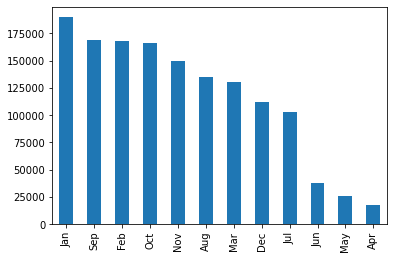

In [10]:
new_df['month_num'] = pd.to_datetime(new_df['date_of_infraction'],format='%Y%m%d').dt.month
new_df['month'] =new_df['month_num'].apply(lambda x: calendar.month_abbr[x])
new_df['month'].value_counts().plot(kind='bar')
plt.show()

In [19]:
#new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the week number
#new_df['week_number'] = new_df['date_of_infraction'].dt.isocalendar().week

# Print the DataFrame to see the results
#print(new_df.head())


new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the day of the week
new_df['day_of_week'] = new_df['date_of_infraction'].dt.strftime('%A')

# Print the DataFrame to see the results
print(new_df.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***60020         2020-01-01                3   
1          ***46473         2020-01-01               29   
2          ***46474         2020-01-01               29   
3          ***46475         2020-01-01               29   
4          ***46674         2020-01-01               29   

           infraction_description  set_fine_amount  time_of_infraction  \
0        PARK ON PRIVATE PROPERTY               30                 1.0   
1  PARK PROHIBITED TIME NO PERMIT               30                 2.0   
2  PARK PROHIBITED TIME NO PERMIT               30                 2.0   
3  PARK PROHIBITED TIME NO PERMIT               30                 4.0   
4  PARK PROHIBITED TIME NO PERMIT               30                 4.0   

  location1          location2 location3 location4 province  month_num month  \
0       NaN       4700 JANE ST       NaN       NaN       SK          1   Jan   
1       OPP  573 CLENDENAN AVE       NaN

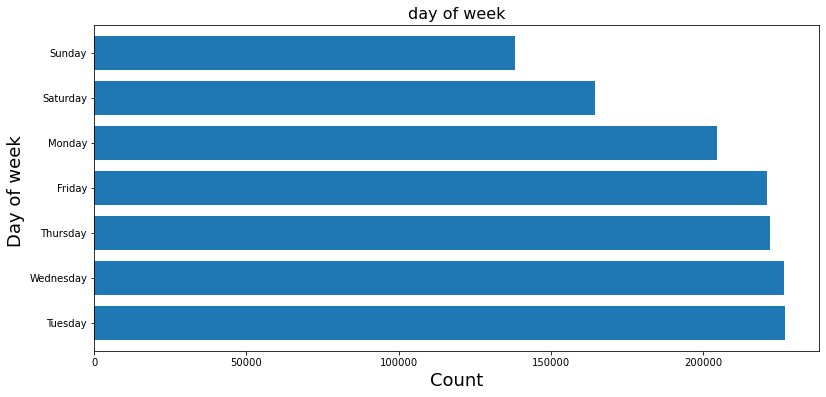

In [22]:
new_df['day_of_week'].value_counts().plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("day of week", fontsize=16)
plt.ylabel("Day of week ", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.show()



The data includes 1,403,663 tickets given out across 366 days. The date range 
spans 365 days from 2020-01-01 to 2020-12-31 .



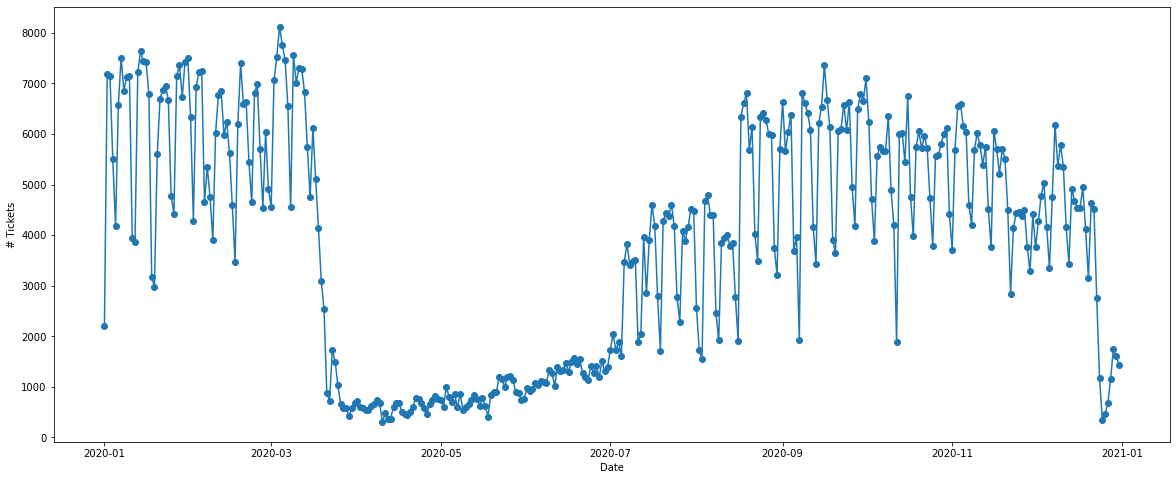

5932

In [11]:
cntIns = new_df.groupby(['date_of_infraction']).size().reset_index(name='count')

x = pd.DataFrame(pd.to_datetime(cntIns['date_of_infraction'],format='%Y%m%d').dt.date)
y = pd.DataFrame(cntIns['count'])

timePlot = pd.concat([x,y], axis=1)

cntObs = timePlot['count'].sum() # count of observations
cntDays = y.shape[0] # count of days

minDate = timePlot['date_of_infraction'].min() # date of first observation
maxDate = timePlot['date_of_infraction'].max() # datet of last observation

dateRange = re.split('\,', str(maxDate - minDate))
dateRange = dateRange[0]

print("\n\nThe data includes", "{:,}".format(cntObs), "tickets given out across", cntDays, "days. The date range \nspans", dateRange, "from", minDate, "to", maxDate, ".\n")

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(xlabel='Date', ylabel='# Tickets')
ax.plot_date(x=timePlot['date_of_infraction'], y=timePlot['count'],ls='-', marker='o')
plt.show()
del x, y, timePlot, fig, ax
gc.collect()

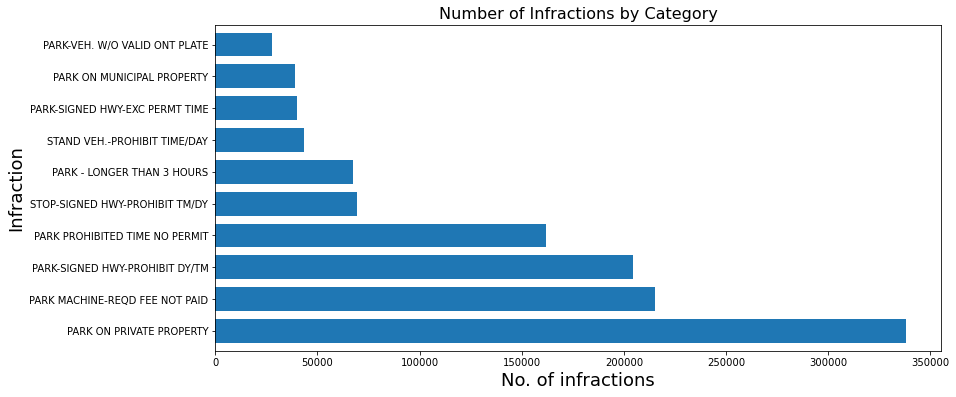

In [12]:
new_df['infraction_description'].value_counts().nlargest(10).plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("Number of Infractions by Category", fontsize=16)
plt.ylabel("Infraction", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [13]:
fine_by_infraction = new_df.groupby('infraction_description')['set_fine_amount'].sum()

In [14]:
print(fine_by_infraction)

infraction_description
FAIL ANGLE PARK/STOP AT 45 DEG       4080
FAIL PARK/STP LEFT WHLS PARALL        750
FAIL PARK/STP NEAR RIGHT LIMIT       5640
FAIL TO (PARK/STOP) ANGLE SPCE        840
FAIL TO PARK/STOP PARALL. CURB      82260
                                   ...   
STOP-ROAD SIDE-STOP/PARK VEH.      115950
STOP-SIGNED HIGHWAY-RUSH HOUR     2928900
STOP-SIGNED HWY-PROHIBIT TM/DY    6928300
STOP-WITHIN (INTERSCTN/PED X)        2700
STOP-WITHIN 9M OF SCHOOL CROSS        900
Name: set_fine_amount, Length: 168, dtype: int64


In [16]:
sorted_data = fine_by_infraction.sort_values(ascending=False)

top_10_infractions = sorted_data.head(10)


print(top_10_infractions)

infraction_description
PARK-SIGNED HWY-PROHIBIT DY/TM    10232450
PARK ON PRIVATE PROPERTY          10145790
STOP-SIGNED HWY-PROHIBIT TM/DY     6928300
PARK MACHINE-REQD FEE NOT PAID     6451080
PARK PROHIBITED TIME NO PERMIT     4851750
STAND VEH.-PROHIBIT TIME/DAY       4325200
STOP-SIGNED HIGHWAY-RUSH HOUR      2928900
PARK IN A FIRE ROUTE               2627500
PARK - LONGER THAN 3 HOURS         2021820
STND ONSTRT ACCESSIBLE NO PRMT     1989000
Name: set_fine_amount, dtype: int64


In [17]:
pd.crosstab(index=new_df['province'], columns='count').nlargest(10,'count')

col_0,count
province,
ON,1357691
QC,20054
AB,4386
AZ,3009
NS,2078
BC,1856
PQ,1766
MB,1677
NY,1621


In [18]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(10,'count')

count       1403544
unique        17638
top        YONGE ST
freq          25251
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,25251
QUEEN ST W,24197
BLOOR ST W,16599
DUNDAS ST W,14199
DANFORTH AVE,12978
QUEEN ST E,10305
ST CLAIR AVE W,10086
BAYVIEW AVE,9877
LAKE SHORE BLVD W,9171


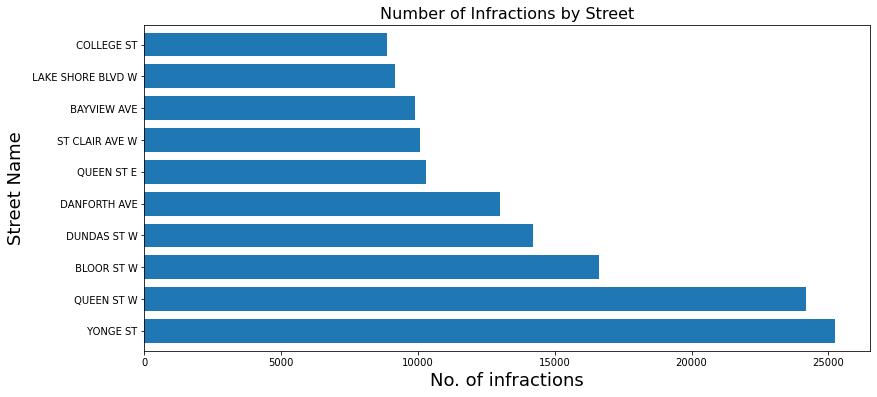

In [19]:
tempticks['location2'].value_counts().nlargest(10).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [20]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(15,'count')

count       1403544
unique        17638
top        YONGE ST
freq          25251
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,25251
QUEEN ST W,24197
BLOOR ST W,16599
DUNDAS ST W,14199
DANFORTH AVE,12978
QUEEN ST E,10305
ST CLAIR AVE W,10086
BAYVIEW AVE,9877
LAKE SHORE BLVD W,9171


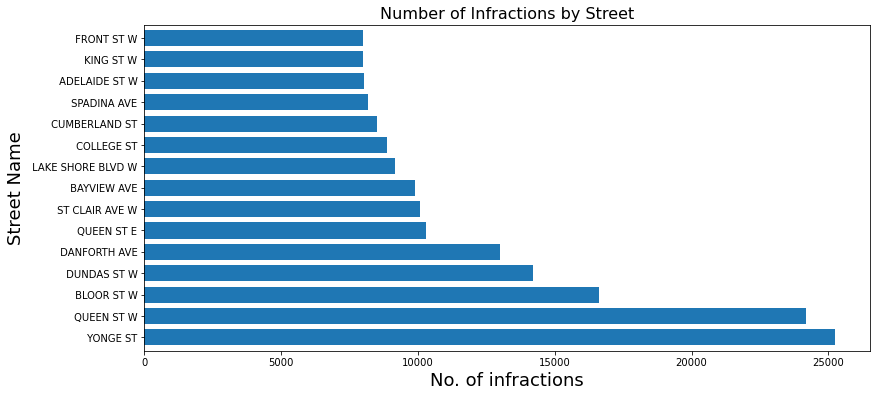

In [21]:
tempticks['location2'].value_counts().nlargest(15).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

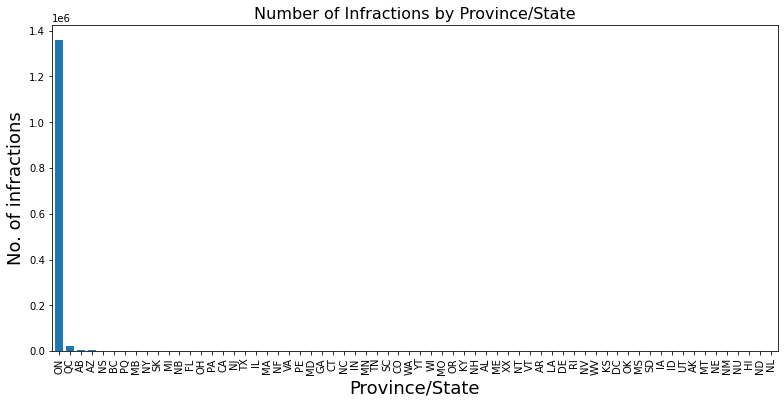

In [22]:
new_df['province'].value_counts().plot(kind='bar',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Province/State", fontsize=16)
plt.xlabel("Province/State", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()

In [23]:
new_df['locality'] = new_df['province'].apply(lambda x: 'Ontario' if x=='ON' else 'Other')
pd.crosstab(index=new_df['locality'], columns='count')

col_0,count
locality,
Ontario,1357691
Other,45972


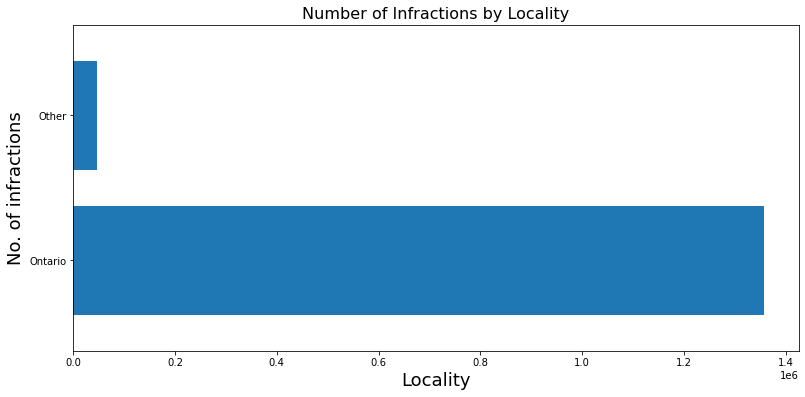

In [24]:
new_df['locality'].value_counts().plot(kind='barh',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Locality", fontsize=16)
plt.xlabel("Locality", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()